# Setiment Analysis using Reddit API 

## Setting Up Reddit API Authentication

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/NegotiationPast5409"
reddit = praw.Reddit(
    client_id="IQleoMr_1Bq2UJbhG1ks-g",
    client_secret="gLrM8yfvJcq2L-wqXo3KROOICNEWyg",
    user_agent=user_agent
)

# Import Necessary libraries

In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

C:\Users\saimi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Trending Topics on Selected Word

In [4]:
# Picking out a trending topic 
headlines = set()
for submission in reddit.subreddit("onedirection").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

❤️ Treat the Lads With Kindness ❤️
13rzjcp
1DMod
1685064597.0
104
0.98
https://www.reddit.com/r/OneDirection/comments/13rzjcp/treat_the_lads_with_kindness/
0


# Selecting headlines of subreddits on selected topic

In [5]:
headlines = set()
for submission in reddit.subreddit("onedirection").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

814


# Creating a Data frame on the Reddit Data

In [6]:
onedirection_df = pd.DataFrame(headlines)
onedirection_df.head()

,0
0,What’s ur “Night Changes” Date??
1,Which is your therapy song and uplifting song ...
2,LOOKING FOR A 1D lunchbox!!!
3,Mention that one song which will make you deaf...
4,Ur aesthetic based on ur favorite 1D member!


In [7]:
onedirection_df.columns

RangeIndex(start=0, stop=1, step=1)

# Renamining Columns to Titles

In [8]:

onedirection_df.columns = ['Titles']
onedirection_df.head()

,Titles
0,What’s ur “Night Changes” Date??
1,Which is your therapy song and uplifting song ...
2,LOOKING FOR A 1D lunchbox!!!
3,Mention that one song which will make you deaf...
4,Ur aesthetic based on ur favorite 1D member!


# Cleaning the retrieved content based on the regex Functions

In [9]:
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
onedirection_df["Titles"]= onedirection_df["Titles"].apply(cleanTxt)

#Show the clean text
onedirection_df.head()

,Titles
0,What’s ur “Night Changes” Date??
1,Which is your therapy song and uplifting song ...
2,LOOKING FOR A 1D lunchbox!!!
3,Mention that one song which will make you deaf...
4,Ur aesthetic based on ur favorite 1D member!


# Cleaning emojis from the data

In [10]:
# Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
onedirection_df["Titles"]= onedirection_df["Titles"].apply(remove_emoji)

#Show the clean text
onedirection_df.head()

,Titles
0,What’s ur “Night Changes” Date??
1,Which is your therapy song and uplifting song ...
2,LOOKING FOR A 1D lunchbox!!!
3,Mention that one song which will make you deaf...
4,Ur aesthetic based on ur favorite 1D member!


In [11]:
onedirection_df.describe()

,Titles
count,814
unique,812
top,
freq,3


In [12]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Creating subjectivity and polarity 

In [13]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
onedirection_df['Subjectivity'] = onedirection_df['Titles'].apply(getSubjectivity)
onedirection_df['Polarity'] = onedirection_df['Titles'].apply(getPolarity)

#Now display data
onedirection_df.head()

,Titles,Subjectivity,Polarity
0,What’s ur “Night Changes” Date??,0.0,0.000
1,Which is your therapy song and uplifting song ...,0.0,0.000
2,LOOKING FOR A 1D lunchbox!!!,0.0,0.000
3,Mention that one song which will make you deaf...,0.0,0.000
4,Ur aesthetic based on ur favorite 1D member!,1.0,0.625


# Grouping Poloarity to categories

In [14]:
# Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
onedirection_df["Insight"] = onedirection_df["Polarity"].apply(getInsight)

onedirection_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,What’s ur “Night Changes” Date??,0.000000,0.000000,Neutral
1,Which is your therapy song and uplifting song ...,0.000000,0.000000,Neutral
2,LOOKING FOR A 1D lunchbox!!!,0.000000,0.000000,Neutral
3,Mention that one song which will make you deaf...,0.000000,0.000000,Neutral
4,Ur aesthetic based on ur favorite 1D member!,1.000000,0.625000,Positive
5,Need the name of this song,0.000000,0.000000,Neutral
6,Looking for the name of a fanfic,0.000000,0.000000,Neutral
7,Got this from a thrift store,0.000000,0.000000,Neutral
8,Barking,0.000000,0.000000,Neutral
9,Which songs are fan favorites of every album?,0.000000,0.000000,Neutral


In [15]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Sentiment Analysis

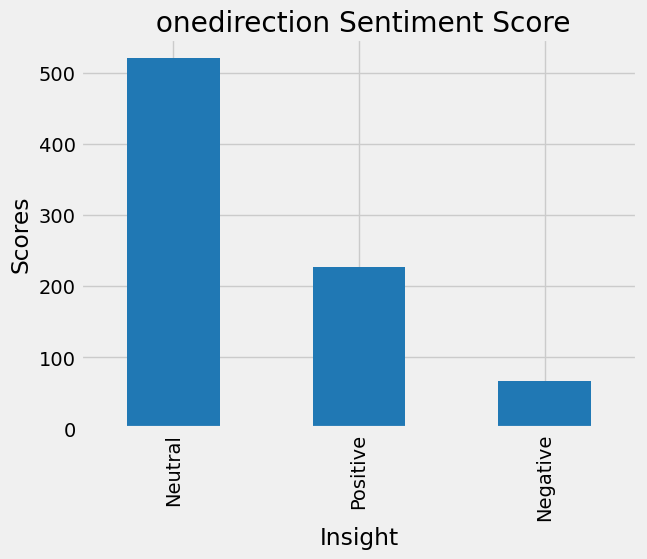

In [16]:
#  Plot the values count of sentiment
plt.title(" onedirection Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
onedirection_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

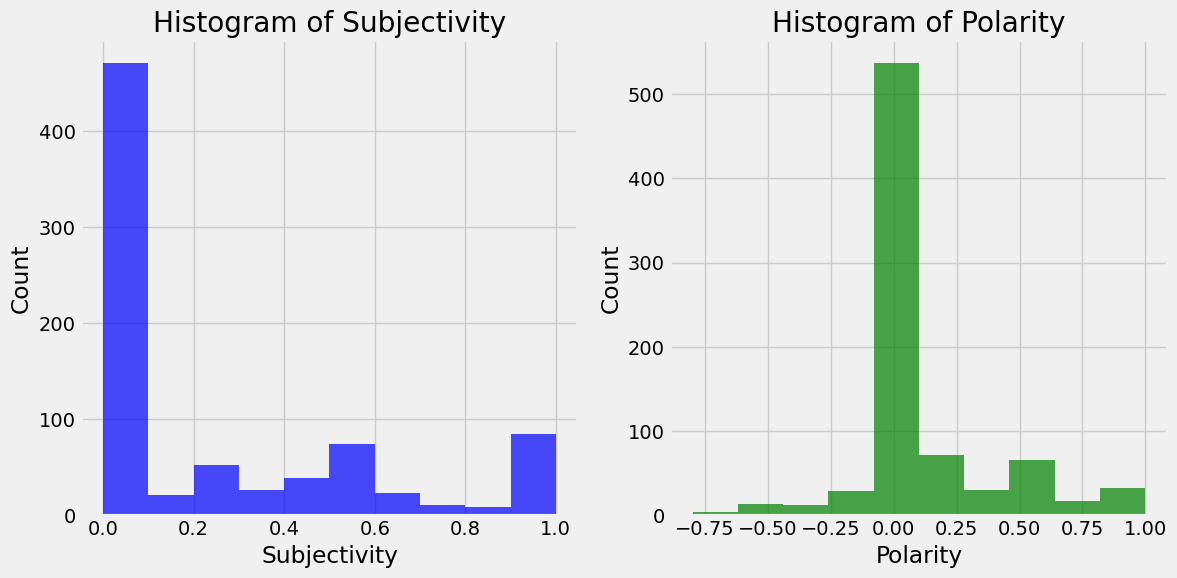

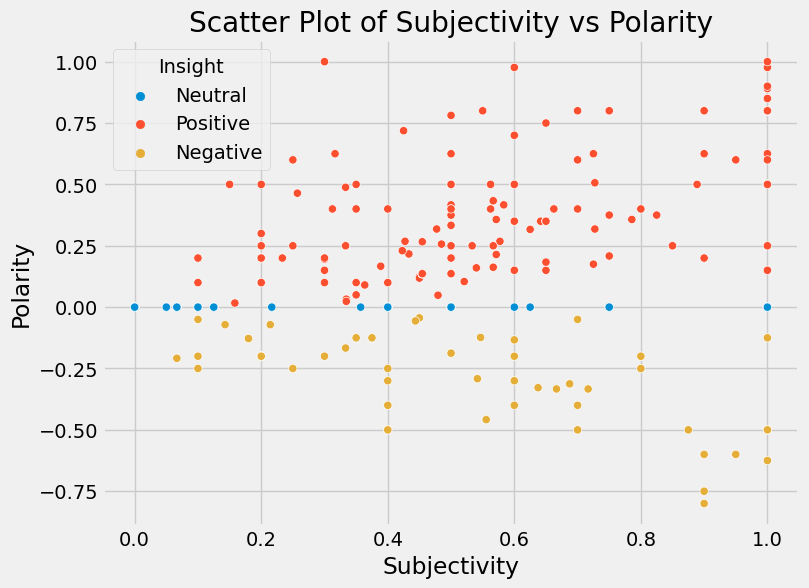

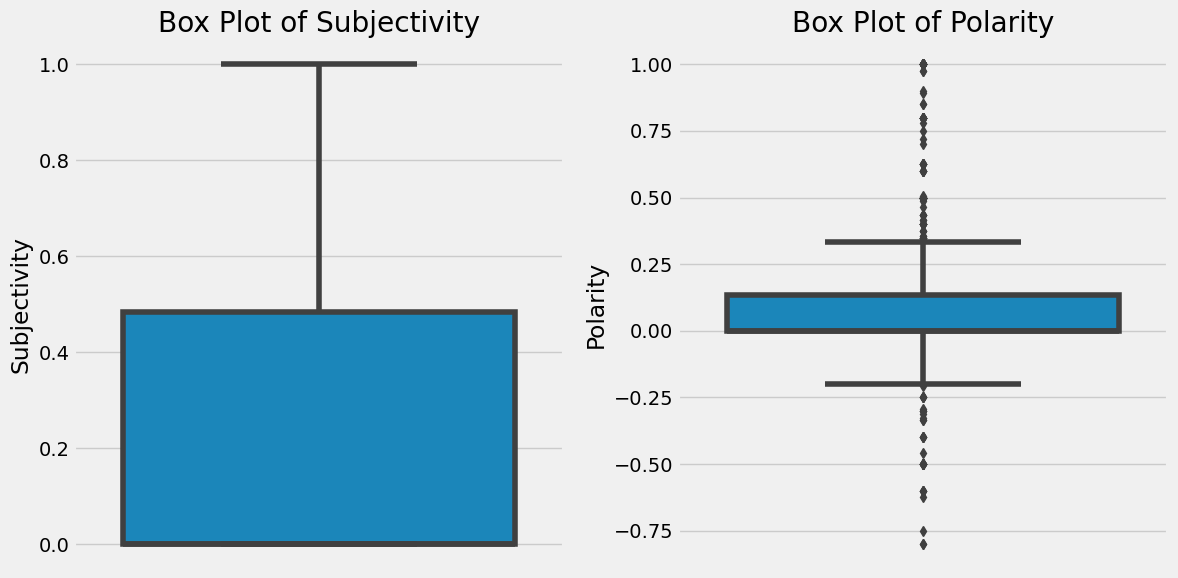

In [20]:
# Histogram of Subjectivity and Polarity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(onedirection_df['Subjectivity'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(onedirection_df['Polarity'], bins=10, color='green', alpha=0.7)
plt.title('Histogram of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Scatter Plot of Subjectivity vs Polarity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Subjectivity', y='Polarity', hue='Insight', data=onedirection_df)
plt.title('Scatter Plot of Subjectivity vs Polarity')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.show()


# Box Plots for Subjectivity and Polarity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=onedirection_df['Subjectivity'])
plt.title('Box Plot of Subjectivity')

plt.subplot(1, 2, 2)
sns.boxplot(y=onedirection_df['Polarity'])
plt.title('Box Plot of Polarity')

plt.tight_layout()
plt.show()





# Worldcloud

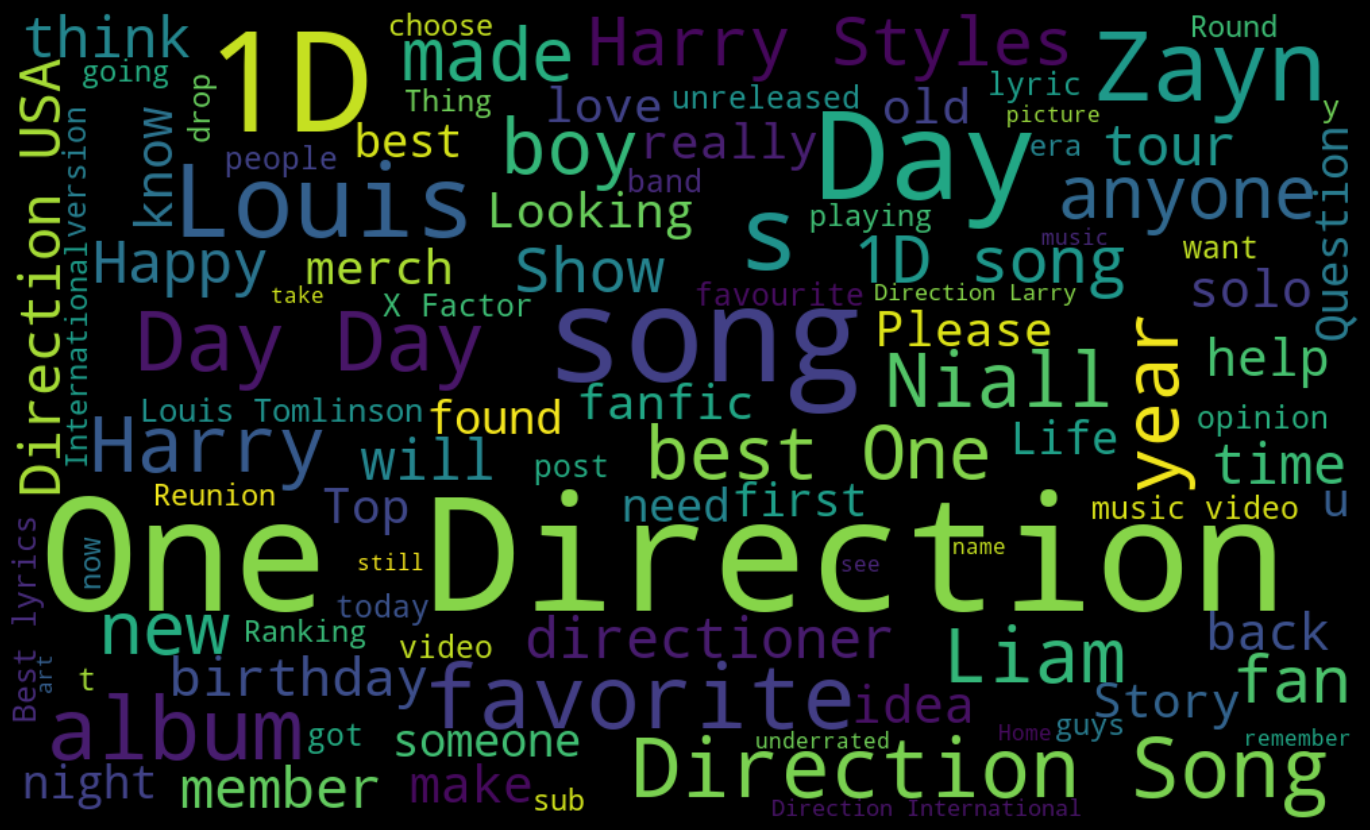

In [17]:
text = ' '.join( [twts for twts in onedirection_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");